<a href="https://colab.research.google.com/github/JaperTai77/Tensorflow_DL/blob/main/tf2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create Tensors

In [ ]:
import tensorflow as tf
# constant tensor
t = tf.constant([[[2,4,5],[4,5,6]],
             [[5,6,3],[2,5,7]],
             [[2,8,5],[3,6,4]]])
t

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[2, 4, 5],
        [4, 5, 6]],

       [[5, 6, 3],
        [2, 5, 7]],

       [[2, 8, 5],
        [3, 6, 4]]], dtype=int32)>

In [ ]:
# varible tensor
t = tf.Variable([1,4,5])
t[0].assign(0)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([0, 4, 5], dtype=int32)>

In [ ]:
I = tf.Variable(np.arange(0, 5))
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 14])>

Constant tensors can't be changed/assigned.

In [ ]:
# random tensors
rand1 = tf.random.Generator.from_seed(10)
rand1 = rand1.normal(shape = (3,2))
rand1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.29604465, -0.21134205],
       [ 0.01063002,  1.5165398 ],
       [ 0.27305737, -0.29925638]], dtype=float32)>

In [ ]:
# shuffle tensors (shuffle data)
t = tf.constant([[0,1],[3,5],[4,8]])
tf.random.set_seed(10) # sets global seed
tf.random.shuffle(t)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [4, 8],
       [3, 5]], dtype=int32)>

In [ ]:
tf.ones(shape = (5,5))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

Tensors can be run on a GPU, array can't.

In [ ]:
import numpy as np
n = np.arange(1,10,dtype = np.int32)
n = tf.constant(n, shape = (3,1,3))
n

<tf.Tensor: shape=(3, 1, 3), dtype=int32, numpy=
array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]], dtype=int32)>

In [ ]:
n.shape, n.ndim, tf.size(n)

(TensorShape([3, 1, 3]), 3, <tf.Tensor: shape=(), dtype=int32, numpy=9>)

In [ ]:
# new axis (1)
n[...,tf.newaxis] #add axis in the end

<tf.Tensor: shape=(3, 1, 3, 1), dtype=int32, numpy=
array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]],


       [[[7],
         [8],
         [9]]]], dtype=int32)>

In [ ]:
# new axis (2)
tf.expand_dims(n,axis = -1) #add axis in the end

<tf.Tensor: shape=(3, 1, 1, 3), dtype=int32, numpy=
array([[[[1, 2, 3]]],


       [[[4, 5, 6]]],


       [[[7, 8, 9]]]], dtype=int32)>

In [ ]:
# operations
t - 10

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[-10,  -9],
       [ -7,  -5],
       [ -6,  -2]], dtype=int32)>

In [ ]:
t/3

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[0.        , 0.33333333],
       [1.        , 1.66666667],
       [1.33333333, 2.66666667]])>

In [ ]:
tf.multiply(t,2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 0,  2],
       [ 6, 10],
       [ 8, 16]], dtype=int32)>

Matrix Multiplication

In [ ]:
t = tf.constant([[0,1],[3,5]])
tf.matmul(t,t)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 3,  5],
       [15, 28]], dtype=int32)>

In [ ]:
t@t

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 3,  5],
       [15, 28]], dtype=int32)>

In [ ]:
# Reshape tensor for matrix multiplication
t2 = tf.constant([[0,1],[3,5],[5,3],[3,7]])
t2 = tf.reshape(t2,shape = (2,4))
print(t2)
t@t2

tf.Tensor(
[[0 1 3 5]
 [5 3 3 7]], shape=(2, 4), dtype=int32)


<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 5,  3,  3,  7],
       [25, 18, 24, 50]], dtype=int32)>

In [ ]:
# Transpose tensor for matrix multiplication
t2 = tf.constant([[0,1],[3,5],[5,3],[3,7]])
t2 = tf.transpose(t2)
print(t2)
t@t2

tf.Tensor(
[[0 3 5 3]
 [1 5 3 7]], shape=(2, 4), dtype=int32)


<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 1,  5,  3,  7],
       [ 5, 34, 30, 44]], dtype=int32)>

Dot Product

In [ ]:
tf.tensordot(t,t2,axes=1)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 5,  3,  3,  7],
       [25, 18, 24, 50]], dtype=int32)>

Data types

In [ ]:
# float32 to float64
t = tf.constant([[3.5,4.3],[5,4.2]])
t.dtype

tf.float32

In [ ]:
t = tf.cast(t,dtype = tf.float16)
t.dtype

tf.float16

Aggregating Tensors

In [ ]:
# absolute value
t = tf.constant([-3,4,5,-2])
tf.abs(t)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([3, 4, 5, 2], dtype=int32)>

In [ ]:
# mean
tf.reduce_mean(t)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
# max
tf.reduce_max(t)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:
# variance
tf.math.reduce_variance(t)

TypeError: ignored

In [ ]:
tf.math.reduce_variance(tf.cast(t,dtype = tf.float16))

<tf.Tensor: shape=(), dtype=float16, numpy=12.5>

In [ ]:
# positional max
F = tf.constant(np.random.randn(50))
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=32>

max is at position 32

In [ ]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Squeeze method
F = tf.constant(np.random.randint(0, 50, 10), shape=(1, 1, 1, 1, 10))
print(F.shape)
F = tf.squeeze(F)
print(F.shape)

(1, 1, 1, 1, 10)
(10,)


Encoding

In [ ]:
l = [0,1,2,3,4,3,2,1,0]
tf.one_hot(l,depth = 5)

<tf.Tensor: shape=(9, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.one_hot(l, depth=5, on_value="On", off_value="Off")

<tf.Tensor: shape=(9, 5), dtype=string, numpy=
array([[b'On', b'Off', b'Off', b'Off', b'Off'],
       [b'Off', b'On', b'Off', b'Off', b'Off'],
       [b'Off', b'Off', b'On', b'Off', b'Off'],
       [b'Off', b'Off', b'Off', b'On', b'Off'],
       [b'Off', b'Off', b'Off', b'Off', b'On'],
       [b'Off', b'Off', b'Off', b'On', b'Off'],
       [b'Off', b'Off', b'On', b'Off', b'Off'],
       [b'Off', b'On', b'Off', b'Off', b'Off'],
       [b'On', b'Off', b'Off', b'Off', b'Off']], dtype=object)>

In [ ]:
t = tf.range(1,10)
t

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# square
tf.square(t)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# square root
tf.sqrt(tf.cast(t, dtype = tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ],
      dtype=float16)>

Using Numpy

In [ ]:
# tensor to numpy array
T = tf.constant(np.array([3., 7., 10.]))
print(type(np.array(T)))
print(type(T.numpy()))
print(T.dtype) # numpy uses float64, tensor uses float32

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<dtype: 'float64'>


In [ ]:
# Check GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Neural Network Regression

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create data
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = X+10

In [ ]:
X[0].shape # no shape, convert into tensors

()

In [ ]:
# convert into tensors and cast onto float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
print(X[0].shape) # one predictor to one response, no shape
X,y

()


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

#### Steps in modeling

Create a model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  
])

In [ ]:
# or
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

Compile a model

In [ ]:
model.compile(loss = tf.keras.losses.mae, # or ['mae']
              optimizer = tf.keras.optimizers.SGD(), # or ['sgd']
              metrics = tf.keras.losses.mae)

Fitting a model

In [ ]:
model.fit(X,y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 172ms/step - loss: 10.7990 - mean_absolute_error: 10.7990
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 10.6665 - mean_absolute_error: 10.6665
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 10.5340 - mean_absolute_error: 10.5340
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 10.4015 - mean_absolute_error: 10.4015
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.2690 - mean_absolute_error: 10.2690


In [ ]:
model.predict([17])

array([[15.912489]], dtype=float32)

#### Improve model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model.fit(X,y,epochs = 50)

Epoch 1/50
1/1 [==============================] - 0s 334ms/step - loss: 13.2723 - mae: 13.2723
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 13.2675 - mae: 13.2675
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 13.2627 - mae: 13.2627
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 13.2579 - mae: 13.2579
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 13.2531 - mae: 13.2531
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 13.2483 - mae: 13.2483
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 13.2435 - mae: 13.2435
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 13.2387 - mae: 13.2387
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 13.2339 - mae: 13.2339
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 13.2291 - mae: 13.2291
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - l

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(lr = 0.1),
              metrics = ['mae'])
model.fit(X,y,epochs = 50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1/1 [==============================] - 0s 283ms/step - loss: 14.7688 - mae: 14.7688
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 14.3188 - mae: 14.3188
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 13.8688 - mae: 13.8688
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 13.4188 - mae: 13.4188
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 12.9688 - mae: 12.9688
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 12.5188 - mae: 12.5188
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 12.0688 - mae: 12.0688
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 11.6188 - mae: 11.6188
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 11.1688 - mae: 11.1688
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 10.7188 - mae: 10.7188
Epoch 11/50
1/1 [==============================] - 0s 20ms/step - l

In [ ]:
model.predict([17])

array([[30.756317]], dtype=float32)

#### Visualize

In [ ]:
X = np.arange(-100, 100, 4); y = X + 10
Xtrain = X[:40];Xtest = X[40:];ytrain = y[:40];ytest = y[40:]

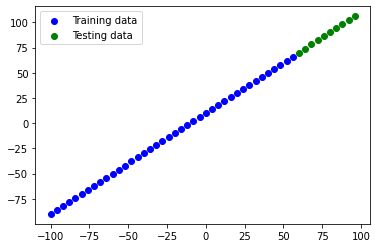

In [ ]:
plt.scatter(Xtrain, ytrain, c='b', label='Training data')
plt.scatter(Xtest, ytest, c='g', label='Testing data')
plt.legend()
plt.plot();

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


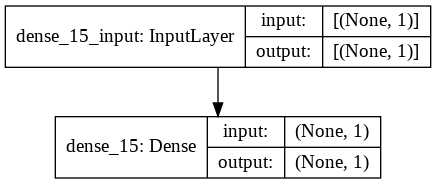

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1],name = 'input_layer'),
    tf.keras.layers.Dense(1,name = 'output_layer')],
    name = 'model1')
model1.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
model1.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


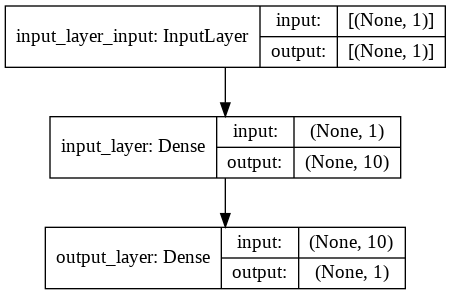

In [ ]:
plot_model(model1, show_shapes=True)

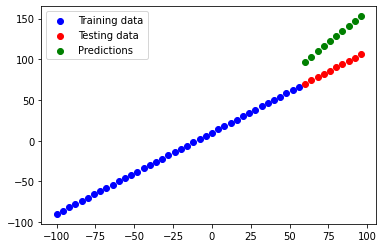

In [ ]:
ypred = model.predict(Xtest)
plt.scatter(Xtrain,ytrain, label = 'Training data', c = 'blue')
plt.scatter(Xtest,ytest,label = 'Testing data', c = 'r')
plt.scatter(Xtest,ypred,label = 'Predictions', c = 'g')
plt.legend()
plt.show()

In [ ]:
model.evaluate(Xtest,ytest)

1/1 [==============================] - 0s 127ms/step - loss: 37.0743 - mae: 37.0743


[37.07426071166992, 37.07426071166992]

In [ ]:
print(ytest.shape)
print(ypred.shape) # not the same shape

(10,)
(10, 1)


In [ ]:
tf.metrics.mean_absolute_error(y_true = ytest,
                               y_pred = tf.squeeze(ypred)) # squeeze to make both the same shape

<tf.Tensor: shape=(), dtype=float32, numpy=37.07426>

In [ ]:
# only get the MAE
tf.metrics.mean_absolute_error(y_true = ytest,
                               y_pred = tf.squeeze(ypred)).numpy()

37.07426

#### Save model

In [ ]:
model.save('SavedModel_format')
# or
model.save('SavedModel_format.h5')

#### Load model

In [ ]:
model = tf.keras.models.load_model("SavedModel_format")
# or
loaded_h5_model = tf.keras.models.load_model("SaveModel_format.h5")

## Regression Example

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

In [2]:
dfD = pd.get_dummies(df, drop_first=True)

In [3]:
X = dfD.drop(columns = ['charges'])
y = dfD.charges

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2)

In [18]:
Xtrain = tf.constant(Xtrain, dtype = 'float32')
Xtest = tf.constant(Xtest,dtype = 'float32')

In [19]:
Xtrain.shape

TensorShape([1070, 8])

In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])
model.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
result = model.fit(Xtrain,ytrain, epochs = 100, verbose=2)

Epoch 1/100
34/34 - 0s - loss: 13068.9287 - mae: 13068.9287
Epoch 2/100
34/34 - 0s - loss: 12900.0459 - mae: 12900.0459
Epoch 3/100
34/34 - 0s - loss: 12554.2334 - mae: 12554.2334
Epoch 4/100
34/34 - 0s - loss: 11883.5977 - mae: 11883.5977
Epoch 5/100
34/34 - 0s - loss: 10764.4072 - mae: 10764.4072
Epoch 6/100
34/34 - 0s - loss: 9342.0146 - mae: 9342.0146
Epoch 7/100
34/34 - 0s - loss: 8065.1460 - mae: 8065.1460
Epoch 8/100
34/34 - 0s - loss: 7444.0264 - mae: 7444.0264
Epoch 9/100
34/34 - 0s - loss: 7331.6431 - mae: 7331.6431
Epoch 10/100
34/34 - 0s - loss: 7309.0967 - mae: 7309.0967
Epoch 11/100
34/34 - 0s - loss: 7290.4771 - mae: 7290.4771
Epoch 12/100
34/34 - 0s - loss: 7269.0806 - mae: 7269.0806
Epoch 13/100
34/34 - 0s - loss: 7249.1377 - mae: 7249.1377
Epoch 14/100
34/34 - 0s - loss: 7229.4316 - mae: 7229.4316
Epoch 15/100
34/34 - 0s - loss: 7207.0557 - mae: 7207.0557
Epoch 16/100
34/34 - 0s - loss: 7187.5625 - mae: 7187.5625
Epoch 17/100
34/34 - 0s - loss: 7165.6250 - mae: 7165.6

In [33]:
model.evaluate(Xtest, ytest)

9/9 [==============================] - 0s 2ms/step - loss: 6565.6309 - mae: 6565.6309


[6565.630859375, 6565.630859375]

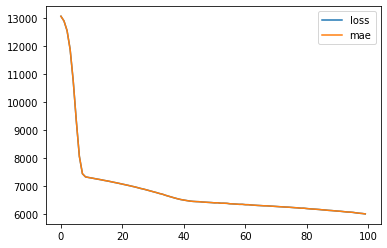

In [34]:
pd.DataFrame(result.history).plot()